

> Importing the Libraries for the project.



In [1]:
import numpy as np  # Importing NumPy for numerical operations and array manipulations
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting graphs and visualizations
import seaborn as sns  # Importing Seaborn for statistical data visualization, built on top of Matplotlib
import tensorflow as tf  # Importing TensorFlow for building and training machine learning models
from tensorflow import keras  # Importing Keras, a high-level API for TensorFlow, to simplify model building
from tensorflow.keras import Layer  # Importing Layer class for creating custom layers in Keras
from tensorflow.keras.models import Sequential  # Importing Sequential model for building neural networks layer-by-layer
from tensorflow.keras.layers import Rescaling , GlobalAveragePooling2D
from tensorflow.keras import layers, optimizers, callbacks  # Importing various modules for layers, optimizers, and callbacks in Keras
from sklearn.utils.class_weight import compute_class_weight  # Importing function to compute class weights for imbalanced datasets
from tensorflow.keras.applications import EfficientNetV2B2  # Importing EfficientNetV2S model for transfer learning
from sklearn.metrics import confusion_matrix, classification_report  # Importing functions to evaluate model performance
import gradio as gr  # Importing Gradio for creating interactive web interfaces for machine learning models

Found 2527 files belonging to 6 classes.
Class names: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Counting images per class...

Image counts per class:
cardboard: 403
glass: 501
metal: 410
paper: 594
plastic: 482
trash: 137


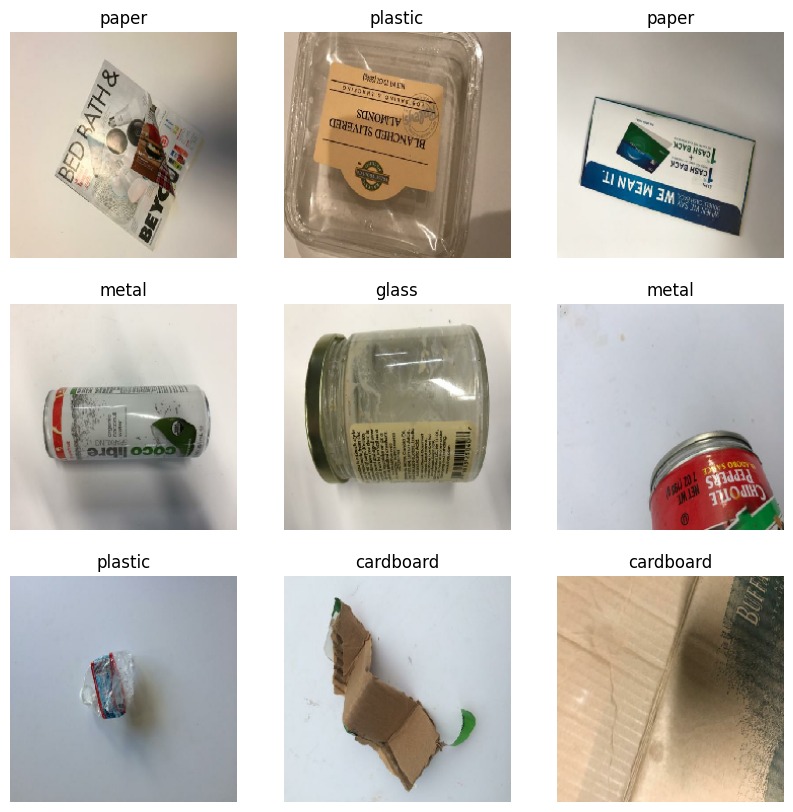

In [4]:

dataset_dir = '/content/drive/MyDrive/TrashType_Image_Dataset' # Replace with your dataset path


image_size = (224, 224)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=image_size,
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True
)

class_names = train_ds.class_names
print(f"Class names: {class_names}")

image_counts = {name: 0 for name in class_names}


print("Counting images per class...")
for images, labels in train_ds:
    for label in labels.numpy():

        class_index = np.argmax(label)
        class_name = class_names[class_index]
        image_counts[class_name] += 1

print("\nImage counts per class:")
for class_name, count in image_counts.items():
    print(f"{class_name}: {count}")

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        # Get the class name from the one-hot encoded label
        class_index = np.argmax(labels[i].numpy())
        plt.title(class_names[class_index])
        plt.axis("off")
plt.show()